# Particle swarm optimization for the `ackley` function

In [1]:
# Import dependencies.
import sympy as sp
import numpy as np
import matplotlib as mpl
import modules.oiplib as oiplib

In [5]:
# Configure plotting.
sp.interactive.init_printing(use_unicode=False, wrap_line=False, no_global=True)
%matplotlib inline

In [6]:
# Define symbolic variables of the ackley function.
#x, y = sp.symbols("x y")

# Define the function.
f, x, y = oiplib.ackley();
display(f)

TypeError: expected str, bytes or os.PathLike object, not _io.BytesIO

                                                                          _________  
                                                                         /  2    2   
    0.5*cos(2*pi*x) + 0.5*cos(2*pi*y)                -0.14142135623731*\/  x  + y    
(- e                                  + E + 20 - 20*e                              ,)

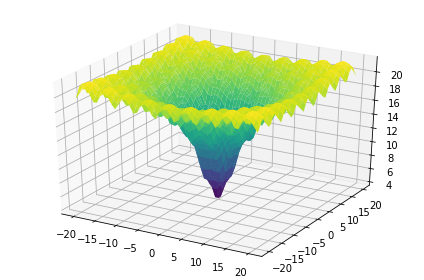

In [8]:
# Define a plot range and plot the function with sympy: 
yMin, yMax, xMin, xMax = -5, 5, -5, 5
sp.plotting.plot3d(f, (x, xMin, xMax), (y, yMin, yMax));